# Main Jupyter Noootbook

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from nlp_preprocessing import VIA_GoGo

## EDA

In [3]:
tweet_df = pd.read_csv('data/db_tweet_emotion.csv', encoding= 'unicode_escape')

In [4]:
tweet_df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [5]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [6]:
tweet = tweet_df['tweet_text']
directed = tweet_df['emotion_in_tweet_is_directed_at']
emotion = tweet_df['is_there_an_emotion_directed_at_a_brand_or_product']

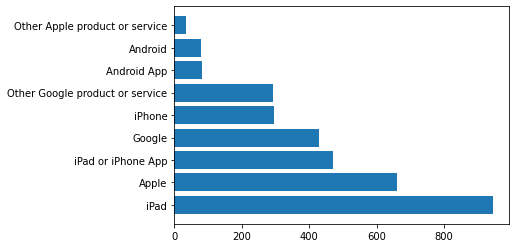

In [7]:
plt.barh(directed.value_counts().index, directed.value_counts().values);

In [8]:
directed.value_counts().sum()

3291

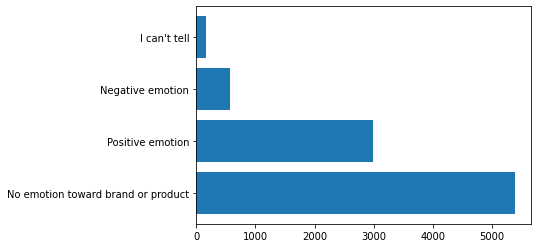

In [9]:
plt.barh(emotion.value_counts().index, emotion.value_counts().values);

In [10]:
emotion.value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

## Clean Up & Tokenize

In [11]:
# Instantiating tokenizer
tokenizer = RegexpTokenizer(r"(?u)\b\w\w+\b")

# Create a list of stopwords in English
sw = stopwords.words('english')


In [12]:
vg = VIA_GoGo()

In [13]:
clean_df = vg.clean_tokenizer(tweet_df, tokenizer, sw)
clean_df

,tweet_text,directed_at,emotion,emotion_num,brand,tweet_text_tokenized,joined_tokens
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iPhone,Negative emotion,-1,Apple,"[wesley83, 3g, iphone, hr, tweeting, rise_aust...",wesley83 3g iphone hr tweeting rise_austin dea...
1,@jessedee know about @fludapp ? awesome ipad/i...,iPad or iPhone App,Positive emotion,1,Apple,"[jessedee, know, fludapp, awesome, ipad, iphon...",jessedee know fludapp awesome ipad iphone app ...
2,@swonderlin can not wait for #ipad 2 also. the...,iPad,Positive emotion,1,Apple,"[swonderlin, wait, ipad, also, sale, sxsw]",swonderlin wait ipad also sale sxsw
3,@sxsw i hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,-1,Apple,"[sxsw, hope, year, festival, crashy, year, iph...",sxsw hope year festival crashy year iphone app...
4,@sxtxstate great stuff on fri #sxsw: marissa m...,Google,Positive emotion,1,Google,"[sxtxstate, great, stuff, fri, sxsw, marissa, ...",sxtxstate great stuff fri sxsw marissa mayer g...
...,...,...,...,...,...,...,...
9084,"@mention yup, but i don't have a third app yet...",NaN,No emotion toward brand or product,0,Google,"[mention, yup, third, app, yet, android, sugge...",mention yup third app yet android suggestion s...
9085,ipad everywhere. #sxsw {link},iPad,Positive emotion,1,Apple,"[ipad, everywhere, sxsw, link]",ipad everywhere sxsw link
9086,"wave, buzz... rt @mention we interrupt your re...",NaN,No emotion toward brand or product,0,Google,"[wave, buzz, rt, mention, interrupt, regularly...",wave buzz rt mention interrupt regularly sched...
9087,"google's zeiger, a physician never reported po...",NaN,No emotion toward brand or product,0,Google,"[google, zeiger, physician, never, reported, p...",google zeiger physician never reported potenti...


In [14]:
clean_df.brand.value_counts(normalize=True)

Apple     0.670371
Google    0.329629
Name: brand, dtype: float64

In [15]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9089 entries, 0 to 9088
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   tweet_text            9089 non-null   object
 1   directed_at           3291 non-null   object
 2   emotion               9089 non-null   object
 3   emotion_num           9089 non-null   int64 
 4   brand                 9089 non-null   object
 5   tweet_text_tokenized  9089 non-null   object
 6   joined_tokens         9089 non-null   object
dtypes: int64(1), object(6)
memory usage: 497.2+ KB


In [16]:
clean_df_binary = clean_df.copy()

In [17]:
# Add Binary Column (pos/neg)
clean_df_binary['emotion_num_bin'] = clean_df_binary['emotion_num']

In [18]:
# Drop Neutral Values
clean_df_binary = clean_df_binary[clean_df_binary['emotion_num_bin'] != 0]

In [19]:
# Replace -1 with 0 for negative values
clean_df_binary['emotion_num_bin'] = clean_df_binary['emotion_num_bin'].replace({-1:0})

In [20]:
clean_df_binary = clean_df_binary.reset_index()

In [21]:
clean_df_binary.emotion_num_bin.value_counts(normalize=True)

1    0.839346
0    0.160654
Name: emotion_num_bin, dtype: float64

In [23]:
!pip install afinn

     |████████████████████████████████| 52 kB 2.1 MB/s eta 0:00:01
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53447 sha256=39ab0380ce24e3f9ceaf1e6d9dc42957614ca95e9b3e7bc29107da3e15d8cbdf
  Stored in directory: /Users/westonshuken/Library/Caches/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn


In [28]:
from afinn import Afinn

In [29]:
afinn = Afinn(language='en')

In [30]:
afinn.score('Bad day.')

-3.0

In [31]:
afinn.score('Good day.')

3.0

In [44]:
clean_df_binary.tweet_text[4]

"@sxtxstate great stuff on fri #sxsw: marissa mayer (google), tim o'reilly (tech books/conferences) &amp; matt mullenweg (wordpress)"

In [43]:
afinn.score(clean_df_binary.tweet_text[4])

3.0

In [22]:
from nltk import FreqDist

frequency_dist_all = FreqDist((clean_df_binary.tweet_text_tokenized.explode()))


# top_ten = list(zip(*frequency_dist_all.most_common(10)))
# tokens = top_ten[0]
# counts = top_ten[1]

frequency_dist_all.most_common(1000)

# plt.figure(figsize=(15, 8))
# plt.bar(tokens, counts);

[('sxsw', 3730),
 ('mention', 2507),
 ('link', 1324),
 ('ipad', 1220),
 ('rt', 1075),
 ('apple', 1057),
 ('google', 887),
 ('iphone', 712),
 ('quot', 639),
 ('store', 607),
 ('app', 461),
 ('new', 403),
 ('austin', 323),
 ('amp', 233),
 ('android', 233),
 ('pop', 231),
 ('ipad2', 224),
 ('get', 206),
 ('launch', 196),
 ('one', 174),
 ('line', 166),
 ('circle', 161),
 ('time', 160),
 ('like', 159),
 ('party', 158),
 ('social', 155),
 ('day', 148),
 ('via', 146),
 ('great', 145),
 ('today', 135),
 ('free', 128),
 ('map', 128),
 ('cool', 125),
 ('go', 122),
 ('win', 119),
 ('mobile', 115),
 ('come', 113),
 ('apps', 113),
 ('people', 112),
 ('sxswi', 109),
 ('network', 109),
 ('good', 108),
 ('need', 103),
 ('awesome', 99),
 ('love', 99),
 ('temporary', 94),
 ('opening', 91),
 ('see', 91),
 ('open', 90),
 ('check', 89),
 ('downtown', 89),
 ('got', 88),
 ('year', 86),
 ('user', 82),
 ('look', 80),
 ('going', 80),
 ('thanks', 80),
 ('even', 80),
 ('mayer', 79),
 ('popup', 79),
 ('think', 77)

## Baseline Models

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(clean_df_binary['joined_tokens'], 
                                                    clean_df_binary['emotion_num_bin'], 
                                                    test_size= 0.25,
                                                    random_state= 5)

In [ ]:
# Using Linear Support Vector Machine
nb1 = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(2,2))),
               ('tfidf', TfidfTransformer()),
               ('clf', SGDClassifier()),
              ])
nb1.fit(X_train, y_train)

y_pred = nb1.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))


In [ ]:
plot_confusion_matrix(nb1, X_test, y_test);

In [ ]:
# Using Naive Bayes
nb2 = Pipeline([('vect', CountVectorizer(ngram_range=(2,2))),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb2.fit(X_train, y_train)

y_pred = nb2.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

In [ ]:
plot_confusion_matrix(nb2, X_test, y_test)

In [ ]:
# Using Logistic Regression
nb3 = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
               ('tfidf', TfidfTransformer()),
               ('clf', LogisticRegression(n_jobs=5)),
              ])
nb3.fit(X_train, y_train)

y_pred = nb3.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

In [ ]:
plot_confusion_matrix(nb3, X_test, y_test);

In [ ]:
nb3 = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
               ('tfidf', TfidfTransformer(smooth_idf=False)),
               ('clf', SGDClassifier())
              ])
nb3.fit(X_train, y_train)

y_pred = nb3.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

In [ ]:
plot_confusion_matrix(nb3, X_test, y_test, normalize='all');

In [ ]:
# from xgboost import XGBClassifier

In [ ]:
# nb4 = Pipeline([('vect', TfidfVectorizer()),
#                ('XGBoost', XGBClassifier(max_depth=6, n_estimators=1000)),
#               ])
# nb4.fit(X_train, y_train)

# y_pred = nb4.predict(X_test)

# print('accuracy %s' % accuracy_score(y_pred, y_test))

### Word2Vec

In [ ]:
import gensim

In [ ]:
model_w2v = gensim.models.Word2Vec(
            sentences=clean_df_binary.tweet_text_tokenized,
            vector_size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(clean_df_binary.tweet_text_tokenized, total_examples=len(clean_df_binary.tweet_text_tokenized), epochs=20)

In [ ]:
model_w2v.wv['iphone']

In [ ]:
model_w2v.wv.most_similar(positive="iphone")

In [ ]:
model_w2v.wv.most_similar(positive="google")

In [ ]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [ ]:
clean_df_binary.tweet_text_tokenized.index

In [ ]:
wordvec_arrays = np.zeros((len(clean_df_binary.tweet_text_tokenized), 200))

for i in range(len(clean_df_binary.emotion_num_bin)):
    wordvec_arrays[i,:] = word_vector(clean_df_binary.tweet_text_tokenized[i], 200)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape    

In [ ]:
wordvec_df

### Word2Vec Modeling

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(wordvec_df, 
                                                    clean_df_binary['emotion_num_bin'], 
                                                    test_size= 0.25,
                                                    random_state= 5)

In [ ]:
X_train

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
clf = SGDClassifier()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))

In [ ]:
rfc = RandomForestClassifier(n_estimators=500, criterion='gini', verbose=1)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))


In [ ]:
plot_confusion_matrix(rfc, X_test, y_test);

In [ ]:
base_models = {'LogisticRegression':
                {'classifier': LogisticRegression(max_iter=1000, random_state=5)},
               
               'MultinomialNB':
                  {'classifier': MultinomialNB()},
     
               'RandomForest':
                  {'classifier': RandomForestClassifier(random_state=5)},
               
               'SGDclf':
                  {'classifier': SGDClassifier()}
              }

In [ ]:
# Create a function to iterate through dict of models
def run_binary_models(models, type_, X, y):
    """
    """
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5) #Splitting the data to predictors/target & test/train
    
    metric_table = pd.DataFrame(columns=['Model', 'CV Score', 'Accuracy', 'Type']) # Creating empty table for model scoring
    
    # Vecorizer
    cvec = CountVectorizer(stop_words={'english'}, min_df=2, max_df=.9)
    cvec.fit(X_train)
        
    X_train_cvec = cvec.transform(X_train)
    X_test_cvec = cvec.transform(X_test)
    
    # Iterating through model dictionary
    for name, model in models.items():
        print(f'Running... {name} Model:')
        
            
        model['classifier'].fit(X_train_cvec, y_train)
        y_pred = model['classifier'].predict(X_test_cvec)
        y_score = model['classifier'].predict_proba(X_test_cvec)[:,1] 
            
        cv_score = cross_val_score(model['classifier'], X_train_cvec, y_train, cv=3)
        cv_score_mean = round(np.mean(cv_score), 4)
            

#         Scoring
        accuracy = accuracy_score(y_test, y_pred)
        
#         Appending Scores to metric table
        metric_table = metric_table.append({'Model': name, 'CV Score': cv_score_mean, 'Accuracy': round(accuracy, 4),
                                           'Type': type_}, ignore_index=True)
        
        print(f'Cross Validation Score: {cv_score}')
        print(f'Test Accuracy Score: {accuracy}\n')
        
    
    return metric_table

In [ ]:
run_binary_models(models, type_, X, y)

### NN

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras import layers

In [ ]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD

In [ ]:
from tensorflow.keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D

In [ ]:
tfidf = TfidfVectorizer()

X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

X_train_vec.shape

In [ ]:
np.array(y_train).reshape(-1, 1).shape

In [ ]:
y_train = pd.get_dummies(y_train)

In [ ]:
y_test = pd.get_dummies(y_test)

In [ ]:
y_train.shape

In [ ]:
X_train

In [ ]:
X_train_vec.shape

In [ ]:
X_test.shape

In [ ]:
y_test.shape

In [ ]:
model = Sequential()
model.add(layers.Dense(600, input_dim=(4750), activation='relu'))
model.add(Dropout(.1))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_vec, y_train, epochs=25, batch_size=100, validation_split=.25, verbose=1)

In [ ]:
results = model.evaluate(X_test_vec, y_test, batch_size=10)
print("test loss, test acc:", results)

In [ ]:
results

### Model Interation for Tuning

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
base_models = {'LogisticRegression':
                {'classifier': LogisticRegression(max_iter=1000, random_state=5)},
               
               'MultinomialNB':
                  {'classifier': MultinomialNB()},
     
               'RandomForest':
                  {'classifier': RandomForestClassifier(random_state=5)},
               
               'SGDclf':
                  {'classifier': SGDClassifier()}
              }

In [ ]:
# Create a function to iterate through dict of models
def run_multiclass_models(models, type_, X, y):
    """
    """
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5) #Splitting the data to predictors/target & test/train
    
    metric_table = pd.DataFrame(columns=['Model', 'CV Score', 'Accuracy', 'Type']) # Creating empty table for model scoring
    
    # Vecorizer
    cvec = CountVectorizer(stop_words={'english'}, min_df=2, max_df=.9)
    cvec.fit(X_train)
        
    X_train_cvec = cvec.transform(X_train)
    X_test_cvec = cvec.transform(X_test)
    
    # Iterating through model dictionary
    for name, model in models.items():
        print(f'Running... {name} Model:')
        
            
        model['classifier'].fit(X_train_cvec, y_train)
        y_pred = model['classifier'].predict(X_test_cvec)
        y_score = model['classifier'].predict_proba(X_test_cvec)[:,1] 
            
        cv_score = cross_val_score(model['classifier'], X_train_cvec, y_train, cv=3)
        cv_score_mean = round(np.mean(cv_score), 4)
            

#         Scoring
        accuracy = accuracy_score(y_test, y_pred)
        
#         Appending Scores to metric table
        metric_table = metric_table.append({'Model': name, 'CV Score': cv_score_mean, 'Accuracy': round(accuracy, 4),
                                           'Type': type_}, ignore_index=True)
        
        print(f'Cross Validation Score: {cv_score}')
        print(f'Test Accuracy Score: {accuracy}\n')
        
    
    return metric_table

In [ ]:
baseline_results = run_multiclass_models(base_models, 'baseline', clean_df['joined_tokens'], clean_df['emotion_num'])
baseline_results